In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/railofy-challenge/sample_submission.csv
/kaggle/input/railofy-challenge/Railofy_training_data_for_model.csv
/kaggle/input/railofy-challenge/Railofy_testing_data_for_model.csv


In [2]:
import seaborn as sns
from imblearn.combine import SMOTETomek

In [3]:
df=pd.read_csv('../input/railofy-challenge/Railofy_training_data_for_model.csv')
df

,pk,QT,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,...,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,target
0,88315053602,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.016290,...,1.341754,1.820791,0.280196,-0.007556,1.091054,0,0,1,0,0
1,88315053603,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.024623,...,1.999409,3.810137,0.276128,-0.007556,1.143376,0,0,1,0,0
2,88314793081,GN,0.728882,0.524062,1.365898,0.885873,1.463205,0.767442,0,0.004357,...,0.618700,0.742814,0.278101,0.435419,5.000000,0,0,0,0,0
3,88312760631,GN,5.000000,5.000000,0.298977,0.764192,0.354716,0.800000,0,0.003798,...,1.117669,1.079367,0.266220,0.091167,5.000000,1,0,0,0,1
4,88312449843,GN,0.614226,0.389327,0.699606,0.917133,1.108489,0.862069,1,0.024571,...,4.393867,5.000000,0.277710,2.103696,1.454895,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36770,21369007273,RL,0.409484,0.596791,1.111341,0.717595,0.842451,0.678571,1,0.023090,...,1.257384,2.217063,0.234643,0.636501,3.971113,1,1,0,0,0
36771,21369007274,RL,0.409484,0.596791,1.111341,0.717595,0.842451,0.678571,1,0.031423,...,1.747777,2.454078,0.233838,0.636501,4.120546,1,1,0,0,0
36772,21345798792,RL,0.450433,2.821902,1.248016,0.843047,0.620754,0.583333,1,0.006132,...,1.141838,0.907823,0.252552,0.550830,1.507716,0,1,0,0,1
36773,21345798794,RL,0.450433,2.821902,1.248016,0.843047,0.620754,0.583333,1,0.022761,...,1.612651,1.436162,0.255523,0.550830,1.652504,0,1,0,0,1


In [4]:
df.isna().sum()

pk        0
QT        0
GRCA      0
CCA       0
JD        0
ODD       0
JS        0
ODS       0
SL        0
NDTD      0
CURP      0
GROP      0
CANP      0
SBRA      0
SCRA      0
GRA       0
CURA      0
RPW       0
CUCA      0
CAR       0
BKT_2     0
CL_1      0
CL_2      0
CL_3      0
target    0
dtype: int64

In [5]:
numCols = df.select_dtypes("number").columns
catCols = df.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))
catCols

['QT']

In [6]:
colo=pd.get_dummies(df['QT'])
df.drop(df.iloc[:,[1]],axis=1,inplace=True)
df=pd.concat([df,colo],axis=1)

In [7]:
df

,pk,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,...,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,target,GN,PQ,RL
0,88315053602,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.016290,0.204678,...,-0.007556,1.091054,0,0,1,0,0,1,0,0
1,88315053603,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.024623,0.216374,...,-0.007556,1.143376,0,0,1,0,0,1,0,0
2,88314793081,0.728882,0.524062,1.365898,0.885873,1.463205,0.767442,0,0.004357,0.089888,...,0.435419,5.000000,0,0,0,0,0,1,0,0
3,88312760631,5.000000,5.000000,0.298977,0.764192,0.354716,0.800000,0,0.003798,0.314147,...,0.091167,5.000000,1,0,0,0,1,1,0,0
4,88312449843,0.614226,0.389327,0.699606,0.917133,1.108489,0.862069,1,0.024571,0.253333,...,2.103696,1.454895,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36770,21369007273,0.409484,0.596791,1.111341,0.717595,0.842451,0.678571,1,0.023090,0.040000,...,0.636501,3.971113,1,1,0,0,0,0,0,1
36771,21369007274,0.409484,0.596791,1.111341,0.717595,0.842451,0.678571,1,0.031423,0.060000,...,0.636501,4.120546,1,1,0,0,0,0,0,1
36772,21345798792,0.450433,2.821902,1.248016,0.843047,0.620754,0.583333,1,0.006132,0.527273,...,0.550830,1.507716,0,1,0,0,1,0,0,1
36773,21345798794,0.450433,2.821902,1.248016,0.843047,0.620754,0.583333,1,0.022761,0.545455,...,0.550830,1.652504,0,1,0,0,1,0,0,1


In [8]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
rb.fit(df)
train = rb.transform(df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

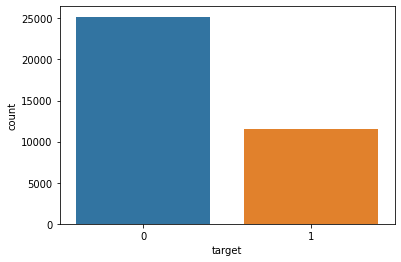

In [9]:
sns.countplot(df['target'])

In [10]:
x=pd.concat([df.iloc[:,0:23],df.iloc[:,24:27]],axis=1)
x.head()

,pk,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,...,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,GN,PQ,RL
0,88315053602,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.016290,0.204678,...,0.280196,-0.007556,1.091054,0,0,1,0,1,0,0
1,88315053603,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.024623,0.216374,...,0.276128,-0.007556,1.143376,0,0,1,0,1,0,0
2,88314793081,0.728882,0.524062,1.365898,0.885873,1.463205,0.767442,0,0.004357,0.089888,...,0.278101,0.435419,5.000000,0,0,0,0,1,0,0
3,88312760631,5.000000,5.000000,0.298977,0.764192,0.354716,0.800000,0,0.003798,0.314147,...,0.266220,0.091167,5.000000,1,0,0,0,1,0,0
4,88312449843,0.614226,0.389327,0.699606,0.917133,1.108489,0.862069,1,0.024571,0.253333,...,0.277710,2.103696,1.454895,1,0,1,0,1,0,0


In [11]:
y=df['target']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [12]:
x.shape,y.shape

((36775, 26), (36775,))

In [13]:
smt = SMOTETomek(random_state=42)
X, Y = smt.fit_resample(x, y)

In [14]:
X.shape,Y.shape

((48838, 26), (48838,))

In [15]:
count0=0;
count1=0;
for i in Y:
    if(i==0):
        count0+=1
    elif(i==1):
        count1+=1
    
count0,count1

(24419, 24419)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4);

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model_R= DecisionTreeClassifier();
model_R.fit(X_train,Y_train);
y_pred_1=model_R.predict(X_test);
accuracy_R=accuracy_score(y_pred_1,Y_test);
accuracy_R

0.8769963144963145

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_RF=RandomForestClassifier();
model_RF.fit(X_train,Y_train);
y_pred=model_RF.predict(X_test);
accuracy_RF=accuracy_score(y_pred,Y_test);
accuracy_RF

0.935452497952498

In [19]:
import xgboost as xgb
model_xg=xgb.XGBClassifier();
model_xg.fit(X_train,Y_train);
y_pred_xg=model_xg.predict(X_test);
accuracy_xg=accuracy_score(y_pred_xg,Y_test);
accuracy_xg

0.9144144144144144

In [20]:
model_1=RandomForestClassifier(random_state=100);
model_1.fit(X,Y)

RandomForestClassifier(random_state=100)

In [21]:
tes=pd.read_csv('../input/railofy-challenge/Railofy_testing_data_for_model.csv')
co=pd.get_dummies(tes['QT'])
test=pd.concat([tes.iloc[:,0],tes.iloc[:,2:24],co],axis=1)
test.head(10)

,pk,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,...,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,GN,PQ,RL
0,8831606085,0.065517,0.041589,1.614476,1.000000,1.773582,0.975610,1,0.008326,0.375000,...,0.280196,1.335478,1.692308,0,0,0,1,1,0,0
1,8831561565,2.710786,1.658815,0.927683,0.836028,0.665093,0.681818,1,0.013590,0.299094,...,0.276128,-0.537617,1.629686,0,1,0,0,1,0,0
2,8831539811,3.365960,1.514607,1.546139,0.961232,1.418866,0.888889,1,0.008322,0.493917,...,0.276128,-0.093347,1.116554,0,1,0,0,1,0,0
3,8831313791,2.342250,1.277346,0.990041,1.000000,0.842451,0.950000,1,0.007728,0.440559,...,0.271758,0.069792,1.442885,0,1,0,0,1,0,0
4,8831070109,0.139225,0.054502,1.575182,0.817376,2.571694,0.773333,1,0.024999,0.411765,...,0.267730,1.296174,1.372434,0,0,1,0,1,0,0
5,8831052568,3.783634,2.476087,1.681106,1.000000,1.684903,0.974359,1,0.078454,0.365801,...,0.271741,0.241796,0.793323,0,1,0,0,1,0,0
6,8831031956,1.384057,1.494552,1.021647,1.000000,0.620754,0.933333,1,0.008332,0.313609,...,0.263351,0.773297,1.731384,0,0,1,0,1,0,0
7,8830976883,1.564230,0.601487,0.996875,0.724395,1.596224,0.734694,1,0.024999,0.523560,...,0.280196,0.676991,1.159578,1,1,0,0,1,0,0
8,8830940571,1.826300,1.426664,0.410880,1.000000,0.665093,0.937500,1,0.008323,0.192825,...,0.267730,0.111633,1.195179,0,0,1,0,1,0,0
9,8830889723,3.472426,2.018073,0.264808,0.558559,0.399056,0.600000,1,0.007983,0.400943,...,0.252552,0.037706,1.302642,1,1,0,0,1,0,0


In [22]:
y_pred_1=model_1.predict(test)
output = pd.DataFrame({'pk': test.pk, 'target': y_pred_1})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
